
# <b>Introduction</b>

- Project dataset: open dataset
- Source: href="https://www.kaggle.com/ahmettezcantekin/beginner-datasets "
- Objectives: Explore the data (EDA), visualize the data, identify and gain new useful feature variable, prepare and clean the data, and implement ML model to find the best model with good performance
- Analysis will be explained in bahasa

## <b>Machine learning model:</b>
- Multiple Linear Regression
- K-NN Regressor
- Random Forest Regressor
- Ada boost Regressor
- Gradient Boosting Regressor
- Bagging Regressor
- Support Vector Machine

### <b>*Created by: Rizki Yoga Marsyamni*</b>


In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
data="beginner_datasets/insurance.csv"
df= pd.read_csv(data)
df1=df
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# <b>EDA</b>

In [331]:
cut_points = [18,25,35,45,55,65]
age_label = ["remaja akhir", "dewasa awal", "dewasa akhir", "lansia awal", "lansia akhir"] 

#implementasi label tersebut dengan membuat kolom baru bernama age_label
df1['age_group'] = pd.cut(df1['age'], bins=cut_points, labels=age_label, include_lowest=True)


In [332]:
cut_points = [0, 18.5, 22.9, 29.9, 100 ]
bmi_label = ["kurang","normal","berlebih", "obesitas" ]

#implementasi label tersebut dengan membuat kolom baru bernama age_label
df1['bmi_group'] = pd.cut(df1['bmi'], bins=cut_points,labels=bmi_label, include_lowest=True)


In [333]:
df1.sample(3)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
1163,18,female,28.215,0,no,northeast,2200.83085,remaja akhir,berlebih
1098,52,female,30.875,0,no,northeast,23045.56616,lansia awal,obesitas
179,41,female,33.155,3,no,northeast,8538.28845,dewasa akhir,obesitas


In [334]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1338 non-null   int64   
 1   sex        1338 non-null   object  
 2   bmi        1338 non-null   float64 
 3   children   1338 non-null   int64   
 4   smoker     1338 non-null   object  
 5   region     1338 non-null   object  
 6   charges    1338 non-null   float64 
 7   age_group  1338 non-null   category
 8   bmi_group  1338 non-null   category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 76.3+ KB


In [335]:
df1.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
age_group    0
bmi_group    0
dtype: int64

In [336]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [337]:
df1.describe(include="O")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [338]:
matrix_corr=df1.corr()
matrix_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

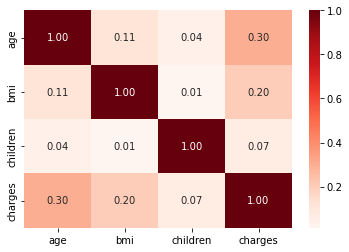

In [339]:
sns.heatmap(matrix_corr, annot=True, cmap="Reds", fmt=".2f")

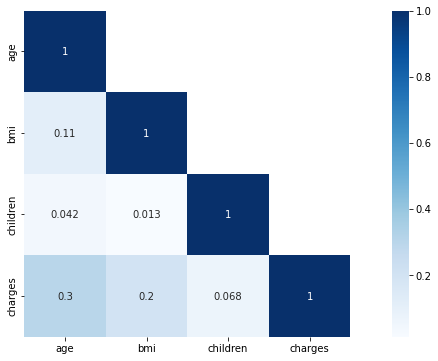

In [340]:
#Corelation matrix.
cor_mat = df1[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(15, 6)
sns.heatmap(data=cor_mat, mask=mask, cmap="Blues",
            square=True, annot=True, cbar=True)
plt.show()


In [341]:
df1.head(3)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.90,0,yes,southwest,16884.9240,remaja akhir,berlebih
1,18,male,33.77,1,no,southeast,1725.5523,remaja akhir,obesitas
2,28,male,33.00,3,no,southeast,4449.4620,dewasa awal,obesitas


## Deskripsi/gambaran umum data secara visual

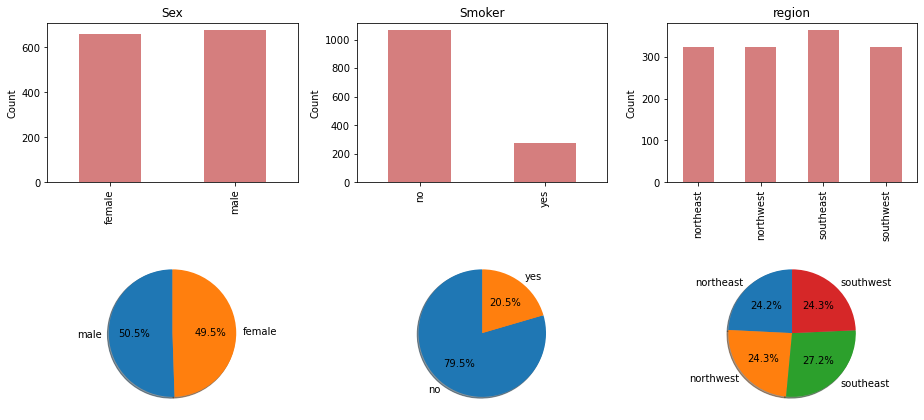

In [342]:
fig, ax = plt.subplots(2, 3, figsize=(13, 6))

#subplot 1
df1['sex'].value_counts().sort_index().plot.bar(ax=ax[0][0], color="#D57E7E")
ax[0][0].set_title('Sex')
ax[0][0].set_ylabel("Count")

#subplot 2
df1['smoker'].value_counts().sort_index().plot.bar(ax=ax[0][1], color="#D57E7E")
ax[0][1].set_title('Smoker')
ax[0][1].set_ylabel("Count")

#subplot 3
df1['region'].value_counts().sort_index().plot.bar(
    ax=ax[0][2], color="#D57E7E")
ax[0][2].set_title('region')
ax[0][2].set_ylabel("Count")

#subplot 4
ax[1][0].pie(x=df1.sex.value_counts(), labels=["male","female"], autopct='%1.1f%%', shadow=True, startangle=90)

#subplot 5
ax[1][1].pie(x=df1.smoker.value_counts(), labels=["no", "yes"],autopct='%1.1f%%', shadow=True, startangle=90)

#subplot 6
ax[1][2].pie(x=df1.region.value_counts().sort_index(), labels=["northeast","northwest","southeast","southwest"], autopct='%1.1f%%', shadow=True, startangle=90)

plt.tight_layout(pad=1.3)
plt.show()


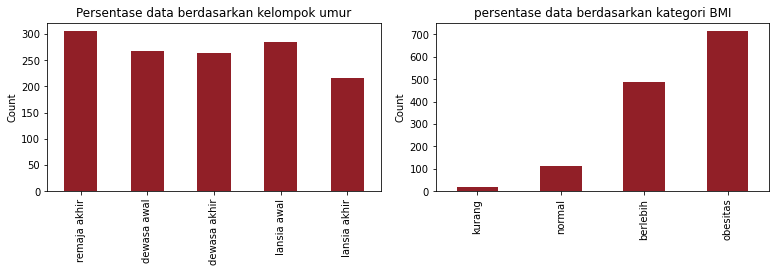

In [343]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

#subplot 1
df1['age_group'].value_counts().sort_index().plot.bar(ax=ax[0], color="#911F27")
ax[0].set_title('Persentase data berdasarkan kelompok umur')
ax[0].set_ylabel("Count")

#subplot 2
df1['bmi_group'].value_counts().sort_index().plot.bar(ax=ax[1], color="#911F27")
ax[1].set_title('persentase data berdasarkan kategori BMI')
ax[1].set_ylabel("Count")

plt.tight_layout(pad=1.5)
plt.show()


Berdasarkan data diatas:
- atribut kelompok umur memiliki sebaran data yang sedikit bervariasi dimana data paling banyak dikategorikan dalam golongan "remaja akhir"
- atribut bmi group memiliki pola kecenderungan. dimana data pengguna asuransi mayoritas diisi oleh orang dengan body mass index kategori "berlebih dan "obesitas"


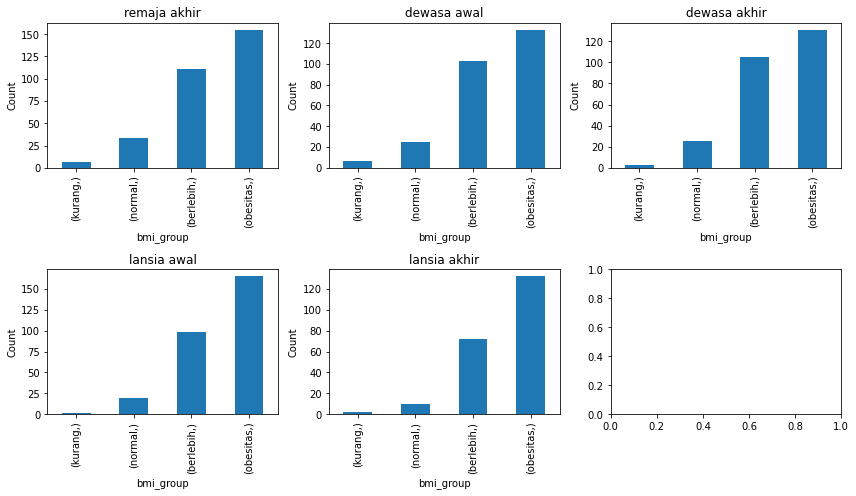

In [344]:
#visualisasi kategori BMI di tiap kategori umur
fig, ax = plt.subplots(2, 3, figsize=(12, 7))

#subplot 1
df1.loc[df1['age_group'] == "remaja akhir", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[0][0])
ax[0][0].set_title('remaja akhir')
ax[0][0].set_ylabel("Count")

#subplot 2
df1.loc[df1['age_group'] == "dewasa awal", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[0][1])
ax[0][1].set_title('dewasa awal')
ax[0][1].set_ylabel("Count")

#subplot 3
df1.loc[df1['age_group'] == "dewasa akhir", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[0][2])
ax[0][2].set_title('dewasa akhir')
ax[0][2].set_ylabel("Count")

#subplot 4
df1.loc[df1['age_group'] == "lansia awal", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[1][0])
ax[1][0].set_title('lansia awal')
ax[1][0].set_ylabel("Count")

#subplot 5
df1.loc[df1['age_group'] == "lansia akhir", ['bmi_group']].value_counts().sort_index().plot.bar(ax=ax[1][1])
ax[1][1].set_title('lansia akhir')
ax[1][1].set_ylabel("Count")

plt.tight_layout(pad=1.1)

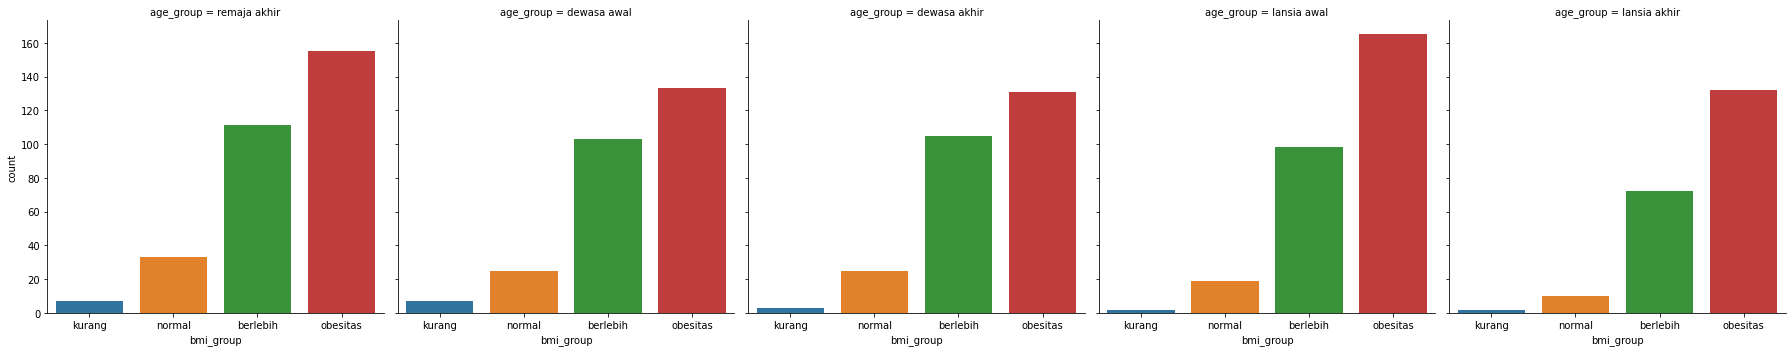

In [345]:
sns.catplot(x="bmi_group", col="age_group", kind="count", data=df1)


- Dengan menggabungkan 2 atribut (bmi group dan age group) didapatkan bahwa memang di setiap kategori umur yang dominan adalah orang yang  tergolong kategori BMI "berlebih" dan "obesitas"
- dari hasil penjabaran visual diatas, semakin memperkuat argumen awal bahwa variabel BMI dan BMI group memiliki "pattern" yang terlihat jelas dan akan memiliki andil penting dalam proses pemodelan ML nantinya


In [346]:
df1.loc[df1["age_group"] == "remaja akhir","age_group"].value_counts()



remaja akhir    306
dewasa awal       0
dewasa akhir      0
lansia awal       0
lansia akhir      0
Name: age_group, dtype: int64

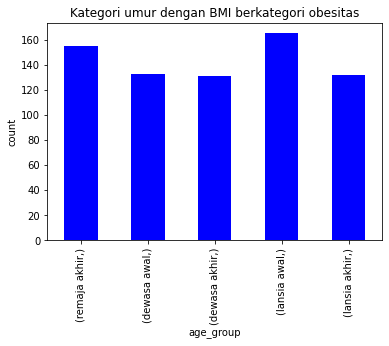

In [347]:
# obesitas berdasarkan kategori umur
df1.loc[df1['bmi_group'] == "obesitas", ['age_group']].value_counts().sort_index().plot.bar(color="blue")
plt.title("Kategori umur dengan BMI berkategori obesitas")
plt.ylabel("count")
plt.show()

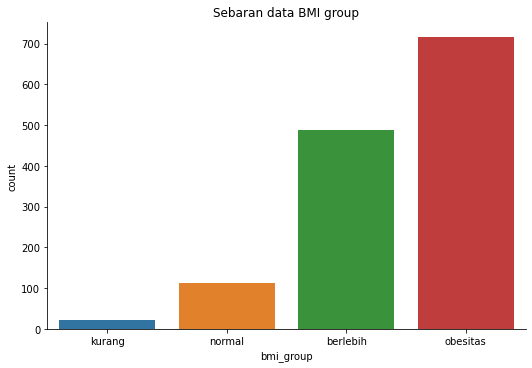

In [348]:
sns.catplot(x="bmi_group", kind="count", data=df1, height=5, aspect=1.5)
plt.title("Sebaran data BMI group")
plt.ylabel("count")
plt.show()


<AxesSubplot:xlabel='region', ylabel='count'>

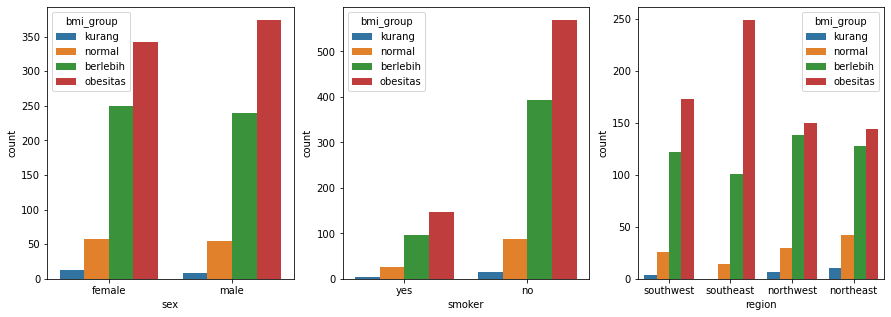

In [349]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
#subplot 1
sns.countplot(data=df1, x="sex", ax=ax[0], hue="bmi_group")
#subplot 2
sns.countplot(data=df1, x="smoker", ax=ax[1], hue="bmi_group")

#subplot 3
sns.countplot(data=df1, x="region", ax=ax[2], hue="bmi_group")


In [350]:
df1.head(3)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.90,0,yes,southwest,16884.9240,remaja akhir,berlebih
1,18,male,33.77,1,no,southeast,1725.5523,remaja akhir,obesitas
2,28,male,33.00,3,no,southeast,4449.4620,dewasa awal,obesitas


## <b> Korelasi kolom "Feature" VS kolom "Target (Charges)"</b>

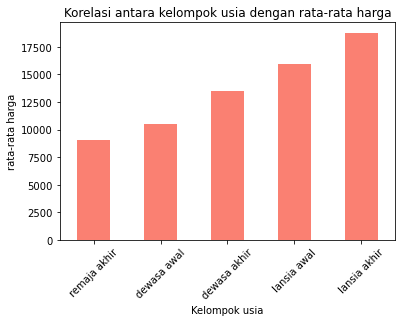

In [351]:
df1_grouped = df1.groupby(['age_group']).mean()
df1_grouped.charges.plot.bar(color="salmon")
plt.xticks(rotation=45)
plt.xlabel("Kelompok usia")
plt.ylabel("rata-rata harga")
plt.title("Korelasi antara kelompok usia dengan rata-rata harga")
plt.show()


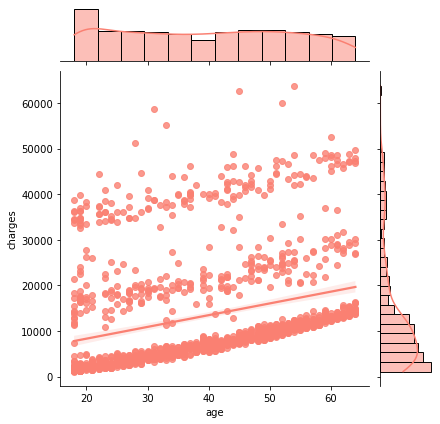

In [352]:
sns.jointplot(data=df1, x='age', y='charges', kind='reg', color="salmon")

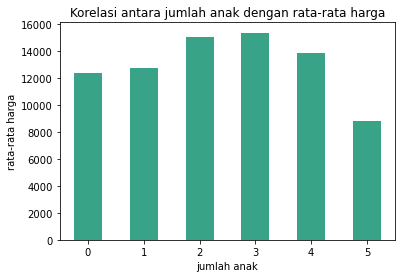

In [353]:
df1_grouped1 = df1.groupby(['children']).mean()
df1_grouped1.charges.plot.bar(color="#39A388")
plt.xticks(rotation=0)
plt.xlabel("jumlah anak")
plt.ylabel("rata-rata harga")
plt.title("Korelasi antara jumlah anak dengan rata-rata harga")
plt.show()

#bentuk non visual
# c1 = df1.loc[df1["children"] == 1, ["charges"]].mean()
# c2 = df1.loc[df1["children"] == 2, ["charges"]].mean()
# c3 = df1.loc[df1["children"] == 3, ["charges"]].mean()

# print("charge asuransi rata2 dengan kondisi memiliki 1 anak: ", c1)
# print("charge asuransi rata2 dengan kondisi memiliki 2 anak: ", c2)
# print("charge asuransi rata2 dengan kondisi memiliki 3 anak: ", c3)


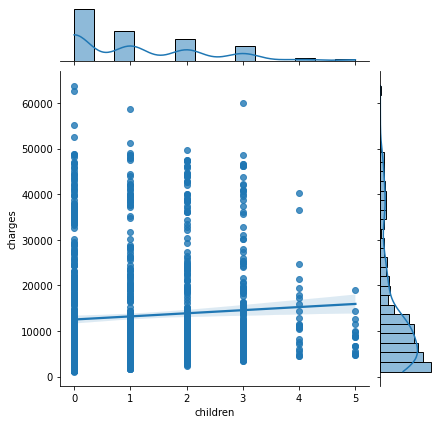

In [354]:
sns.jointplot(data=df1, x='children', y='charges', kind="reg")

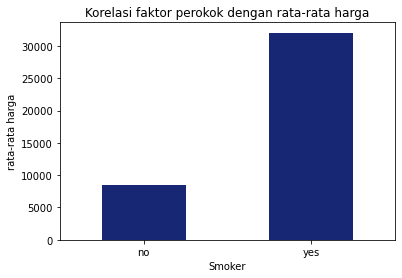

In [355]:
df1_grouped2 = df1.groupby(['smoker']).mean()
df1_grouped2.charges.plot.bar(color="#172774")
plt.xticks(rotation=0)
plt.xlabel("Smoker")
plt.ylabel("rata-rata harga")
plt.title("Korelasi faktor perokok dengan rata-rata harga")
plt.show()


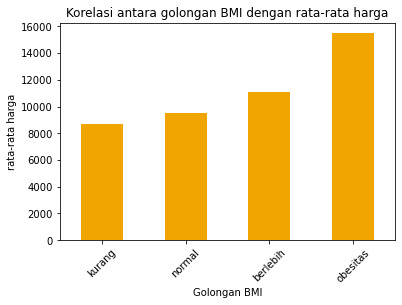

In [356]:
df1_grouped3 = df1.groupby(['bmi_group']).mean()
df1_grouped3.charges.plot.bar(color="#F0A500")
plt.xticks(rotation=45)
plt.xlabel("Golongan BMI")
plt.ylabel("rata-rata harga")
plt.title("Korelasi antara golongan BMI dengan rata-rata harga")
plt.show()


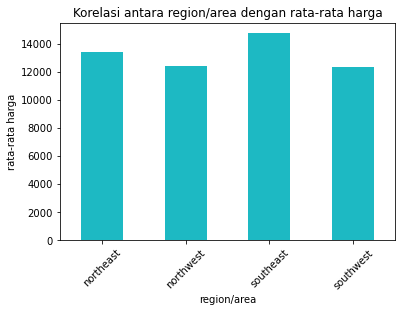

In [357]:
df1_grouped4= df1.groupby(['region']).mean()
df1_grouped4.charges.plot.bar(color="#1DB9C3")
plt.xticks(rotation=45)
plt.xlabel("region/area")
plt.ylabel("rata-rata harga")
plt.title("Korelasi antara region/area dengan rata-rata harga")
plt.show()


# <b>Kesimpulan EDA</b>
Hasil EDA dan visualisasi mempermudah melihat data2 yang memiliki pola dan keterikatan antar satu variabel dengan variabel lain, yang sangat berguna dalam meningkatkan performa model. kesimpulan nya antara lain:
- diperlukan pengelompokan umur dan BMI untuk mempermudah melihat korelasinya dengan feature dan target variabel
- kolom *"sex"* memiliki sebaran nilai yang merata antara "male" dan "female", namun tidak memiliki pola apabila dikaitkan dengan kolom lain
- kolom *"smoker"* memiliki pola yang terlihat jelas jika dibandingkan dengan variabel target *"charges"*, dimana perokok cenderung membayar charge <b>lebih mahal</b>, akan tetapi kebanyakan yang tergolong obesitas berasal dari kalangan non perokok
- kolom *"region"* tidak memiliki pola jika dibandingkan dengan kolom *"charges"*
- kolom *"age_group"* memiliki korelasi dengan kolom *"charges"* dimana semakin tua golongan umur, semakin membayar mahal charge nya
- kolom *"bmi_group"* memiliki korelasi dengan kolom *"charges"* dimana semakin mengarah ke obesitas, charge nya akan semakin tinggi
- kolom *"children"*  memiliki sedikit pola jika dibandingkan dengan varabel target/ *"charges"*

sampai tahap ini, kolom:
- age
- bmi
- smoker
- charges 
- age group
- bmi group

memiliki pola, dan cocok digunakan dalam modelling.

In [358]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
0,19,female,27.900,0,yes,southwest,16884.92400,remaja akhir,berlebih
1,18,male,33.770,1,no,southeast,1725.55230,remaja akhir,obesitas
2,28,male,33.000,3,no,southeast,4449.46200,dewasa awal,obesitas
3,33,male,22.705,0,no,northwest,21984.47061,dewasa awal,normal
4,32,male,28.880,0,no,northwest,3866.85520,dewasa awal,berlebih


## Checking and handling outlier

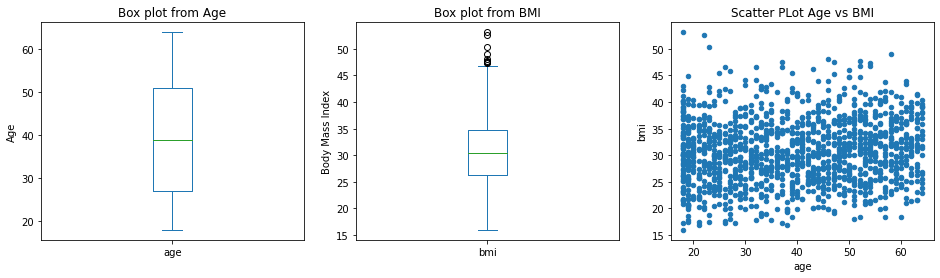

In [359]:
#outlier detection
f, ax = plt.subplots(1, 3, figsize=(16, 4))

df1.age.plot.box(ax=ax[0])
ax[0].set_ylabel('Age')
ax[0].set_title("Box plot from Age")

df1.bmi.plot.box(ax=ax[1])
ax[1].set_ylabel('Body Mass Index')
ax[1].set_title("Box plot from BMI")

df1.plot.scatter(x='age', y='bmi', ax=ax[2])
ax[2].set_title("Scatter PLot Age vs BMI")

plt.show()


## 2 grafik boxplot dibawah, akan memperlihatkan persisnya letak di grup mana outlier itu berada
Memperjelas "bmi group" mana saja yang terdapat data outlier

<AxesSubplot:xlabel='bmi_group', ylabel='bmi'>

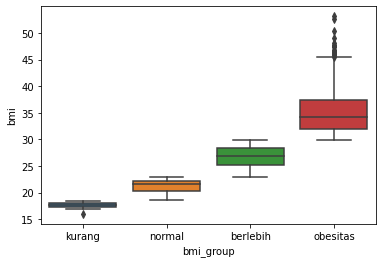

In [360]:
sns.boxplot(data=df1,x='bmi_group', y='bmi', showfliers=True)

Dari data diatas, kategori bmi "berlebih" memiliki *outlier*

<AxesSubplot:xlabel='age_group', ylabel='bmi'>

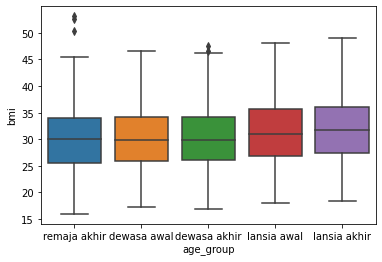

In [361]:
sns.boxplot(data=df1, x='age_group', y='bmi', showfliers=True)


dilihat dari sudut pandang lain:
kalau diperjelas, dari data diatas, kategori "remaja akhir" yang memiliki *outlier*

<AxesSubplot:xlabel='age_group', ylabel='age'>

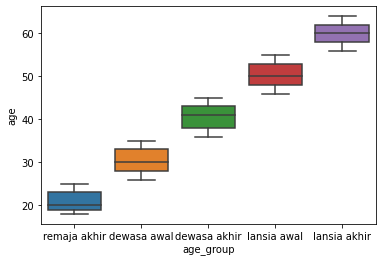

In [362]:
sns.boxplot(data=df1, x='age_group', y='age', showfliers=True)


dari data diatas terbukti bahwa "age" tidak memiliki outlier

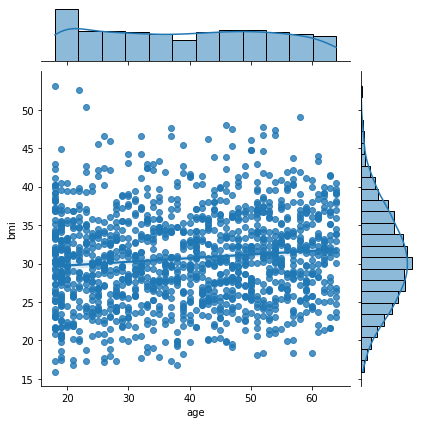

In [363]:
sns.jointplot(data=df1, x='age', y='bmi',kind='reg')
#opsi lain pake scatter plot (jointplot juga bisa pake "hue", tapi kalo "hue" ada, "kind" gak bisa di tampilkan)
#sns.scatterplot(data=df1, x='age', y='bmi_iqr', hue="age_group")
#https://seaborn.pydata.org/tutorial/function_overview.html

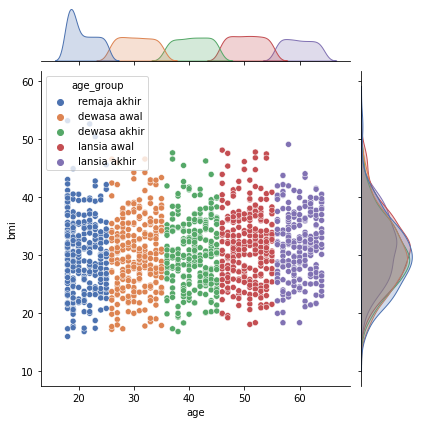

In [364]:
sns.jointplot(data=df1, x='age', y='bmi', hue='age_group', palette='deep')

In [365]:
#menghitung IQR (interquartile range)
q1 = df1.bmi.quantile(0.25)
q3 = df1.bmi.quantile(0.75)

iqr = q3-q1

#mengkitung nilai batas bawah dan batas atas
iqr_lower = q1 - 1.5*iqr
iqr_upper = q3 + 1.5*iqr

#Print nilai
print(iqr_lower, iqr_upper)


13.7 47.290000000000006


In [366]:
outlier_atas = df1.loc[df1["bmi"] > iqr_upper, :]
outlier_atas


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group
116,58,male,49.06,0,no,southeast,11381.32540,lansia akhir,obesitas
286,46,female,48.07,2,no,northeast,9432.92530,lansia awal,obesitas
401,47,male,47.52,1,no,southeast,8083.91980,lansia awal,obesitas
543,54,female,47.41,0,yes,southeast,63770.42801,lansia awal,obesitas
847,23,male,50.38,1,no,southeast,2438.05520,remaja akhir,obesitas
860,37,female,47.60,2,yes,southwest,46113.51100,dewasa akhir,obesitas
1047,22,male,52.58,1,yes,southeast,44501.39820,remaja akhir,obesitas
1088,52,male,47.74,1,no,southeast,9748.91060,lansia awal,obesitas
1317,18,male,53.13,0,no,southeast,1163.46270,remaja akhir,obesitas


In [367]:
#tahap pertama ganti outlier dengan nilai NA sehingga menjadi missing value
df1["bmi_iqr"] = df1["bmi"]
df1.loc[df1["bmi_iqr"] < iqr_lower, ["bmi_iqr","bmi_group"]] = pd.NA
df1.loc[df1["bmi_iqr"] > iqr_upper, ["bmi_iqr","bmi_group"]] = pd.NA




In [368]:
df1.loc[df1["bmi"] > iqr_upper, :]


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,bmi_iqr
116,58,male,49.06,0,no,southeast,11381.32540,lansia akhir,NaN,<NA>
286,46,female,48.07,2,no,northeast,9432.92530,lansia awal,NaN,<NA>
401,47,male,47.52,1,no,southeast,8083.91980,lansia awal,NaN,<NA>
543,54,female,47.41,0,yes,southeast,63770.42801,lansia awal,NaN,<NA>
847,23,male,50.38,1,no,southeast,2438.05520,remaja akhir,NaN,<NA>
860,37,female,47.60,2,yes,southwest,46113.51100,dewasa akhir,NaN,<NA>
1047,22,male,52.58,1,yes,southeast,44501.39820,remaja akhir,NaN,<NA>
1088,52,male,47.74,1,no,southeast,9748.91060,lansia awal,NaN,<NA>
1317,18,male,53.13,0,no,southeast,1163.46270,remaja akhir,NaN,<NA>


In [369]:
df1.bmi.mean()

30.663396860986538

In [370]:
df1.bmi_iqr.mean()

30.53734762979683

## Note
nilai <b>30.53734762979683</b> yang merupakan nilai rata-rata akan dimasukkan ke dalam bmi_iqr yang bernilai NA, dan karena nilai <b>30.53734762979683</b> masuk kategori <b>*"berlebih"*</b>, maka akan diinputkan juga ke dalam variabel bmi_group

In [371]:
df1.bmi_iqr.fillna(30.53734762979683, inplace=True)


In [372]:
df1.bmi_group.fillna("berlebih", inplace=True)


In [373]:
df1.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
age_group    0
bmi_group    0
bmi_iqr      0
dtype: int64

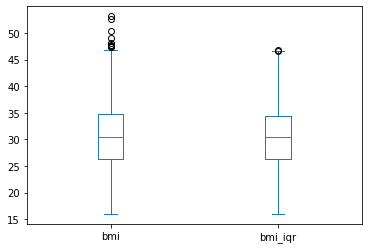

In [374]:
df1[["bmi","bmi_iqr"]].plot.box()
plt.show()

In [375]:
#cek skewwnes setelah handling outlier
df1[["bmi","bmi_iqr"]].skew()

bmi        0.284047
bmi_iqr    0.157710
dtype: float64

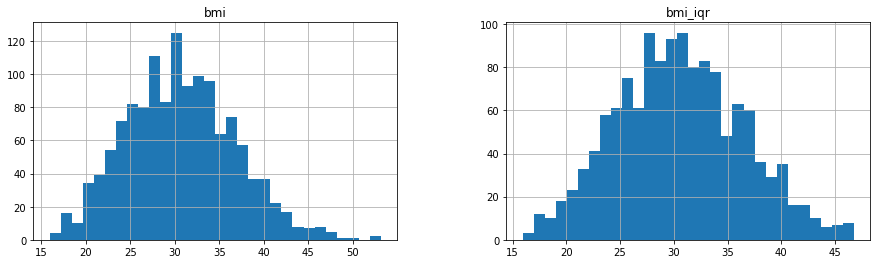

In [376]:
df1[["bmi", "bmi_iqr"]].hist(bins=30, figsize=(15,4))
plt.show()


Dari visualisasi diatas, dapat dilihat bahwa handling outlier dengan metode mean telah berhasil memperbaiki skewness/ kemiringan data pada kolom BMI. hasil yang diperoleh cukup memuaskan dan nilai bmi_iqr siap digunakan di tahap pemodelan

In [377]:
df1.loc[df1["bmi_iqr"] == 30.53734762979683,: ]


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,bmi_iqr
116,58,male,49.06,0,no,southeast,11381.32540,lansia akhir,berlebih,30.537348
286,46,female,48.07,2,no,northeast,9432.92530,lansia awal,berlebih,30.537348
401,47,male,47.52,1,no,southeast,8083.91980,lansia awal,berlebih,30.537348
543,54,female,47.41,0,yes,southeast,63770.42801,lansia awal,berlebih,30.537348
847,23,male,50.38,1,no,southeast,2438.05520,remaja akhir,berlebih,30.537348
860,37,female,47.60,2,yes,southwest,46113.51100,dewasa akhir,berlebih,30.537348
1047,22,male,52.58,1,yes,southeast,44501.39820,remaja akhir,berlebih,30.537348
1088,52,male,47.74,1,no,southeast,9748.91060,lansia awal,berlebih,30.537348
1317,18,male,53.13,0,no,southeast,1163.46270,remaja akhir,berlebih,30.537348


In [378]:
df1.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,bmi_iqr
0,19,female,27.900,0,yes,southwest,16884.92400,remaja akhir,berlebih,27.900
1,18,male,33.770,1,no,southeast,1725.55230,remaja akhir,obesitas,33.770
2,28,male,33.000,3,no,southeast,4449.46200,dewasa awal,obesitas,33.000
3,33,male,22.705,0,no,northwest,21984.47061,dewasa awal,normal,22.705
4,32,male,28.880,0,no,northwest,3866.85520,dewasa awal,berlebih,28.880


In [379]:
from sklearn.preprocessing import OneHotEncoder
#inisiasi encoder
ohc = OneHotEncoder(handle_unknown="ignore")

#fit dan transform
new_features = ohc.fit_transform(df1[["children"]])

#masukkan ke dataframe dan hasilnya
cols_name = [x for x in df1["children"].unique()]
df_children_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_children_ohc.sample(3)


,0,1,3,2,5,4
897,0.0,1.0,0.0,0.0,0.0,0.0
957,0.0,1.0,0.0,0.0,0.0,0.0
129,0.0,0.0,1.0,0.0,0.0,0.0


In [380]:
#fit dan transform
new_features = ohc.fit_transform(df1[["smoker"]])

#masukkan ke dataframe dan hasilnya
cols_name = [x for x in df1["smoker"].unique()]
df_smoker_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_smoker_ohc.sample(3)


,yes,no
1057,1.0,0.0
790,1.0,0.0
116,1.0,0.0


In [381]:
#fit dan transform
new_features = ohc.fit_transform(df1[["age_group"]])

#masukkan ke dataframe dan hasilnya
cols_name = [x for x in df1["age_group"].unique()]
df_age_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_age_group_ohc.sample(3)


,remaja akhir,dewasa awal,lansia awal,dewasa akhir,lansia akhir
490,0.0,0.0,0.0,0.0,1.0
966,0.0,0.0,0.0,1.0,0.0
685,0.0,0.0,0.0,1.0,0.0


In [382]:
#fit dan transform
new_features = ohc.fit_transform(df1[["bmi_group"]])

#masukkan ke dataframe dan hasilnya
cols_name = [x for x in df1["bmi_group"].unique()]
df_bmi_group_ohc = pd.DataFrame(new_features.toarray(), columns=cols_name)

df_bmi_group_ohc.sample(3)


,berlebih,obesitas,normal,kurang
416,0.0,0.0,0.0,1.0
64,0.0,0.0,1.0,0.0
97,0.0,0.0,0.0,1.0


In [383]:
#gabung ke dataset utama
df1 = pd.concat([df1, df_children_ohc, df_smoker_ohc, df_age_group_ohc, df_bmi_group_ohc], axis=1)


In [384]:
df1.head(5)

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_group,bmi_iqr,...,no,remaja akhir,dewasa awal,lansia awal,dewasa akhir,lansia akhir,berlebih,obesitas,normal,kurang
0,19,female,27.900,0,yes,southwest,16884.92400,remaja akhir,berlebih,27.900,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,remaja akhir,obesitas,33.770,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,dewasa awal,obesitas,33.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,dewasa awal,normal,22.705,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,dewasa awal,berlebih,28.880,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [385]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1338 non-null   int64   
 1   sex           1338 non-null   object  
 2   bmi           1338 non-null   float64 
 3   children      1338 non-null   int64   
 4   smoker        1338 non-null   object  
 5   region        1338 non-null   object  
 6   charges       1338 non-null   float64 
 7   age_group     1338 non-null   category
 8   bmi_group     1338 non-null   category
 9   bmi_iqr       1338 non-null   float64 
 10  0             1338 non-null   float64 
 11  1             1338 non-null   float64 
 12  3             1338 non-null   float64 
 13  2             1338 non-null   float64 
 14  5             1338 non-null   float64 
 15  4             1338 non-null   float64 
 16  yes           1338 non-null   float64 
 17  no            1338 non-null   float64 
 18  remaja a

In [386]:
# determining the name of the file
file_name = 'insurance_1.xlsx'

# saving the excel
df1.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')


DataFrame is written to Excel File successfully.


In [387]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1['age_scaled']= scaler.fit_transform(df1[['age']])
df1['bmi_iqr_scaled'] = scaler.fit_transform(df1[['bmi_iqr']])


## plot age vs bmi_iqr yang sudah di normalisasi (menggunakan MinMaxScaler)

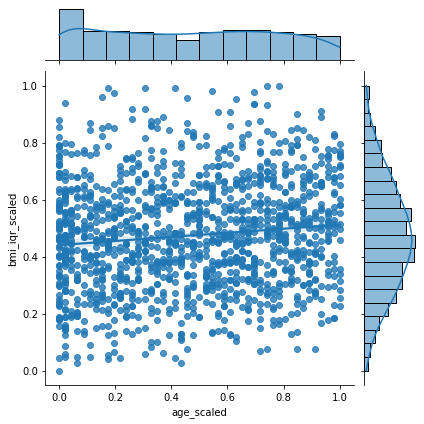

In [388]:
sns.jointplot(data=df1, x='age_scaled', y='bmi_iqr_scaled', kind='reg')

In [389]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             1338 non-null   int64   
 1   sex             1338 non-null   object  
 2   bmi             1338 non-null   float64 
 3   children        1338 non-null   int64   
 4   smoker          1338 non-null   object  
 5   region          1338 non-null   object  
 6   charges         1338 non-null   float64 
 7   age_group       1338 non-null   category
 8   bmi_group       1338 non-null   category
 9   bmi_iqr         1338 non-null   float64 
 10  0               1338 non-null   float64 
 11  1               1338 non-null   float64 
 12  3               1338 non-null   float64 
 13  2               1338 non-null   float64 
 14  5               1338 non-null   float64 
 15  4               1338 non-null   float64 
 16  yes             1338 non-null   float64 
 17  no            

In [390]:
df1.columns

Index([           'age',            'sex',            'bmi',       'children',
               'smoker',         'region',        'charges',      'age_group',
            'bmi_group',        'bmi_iqr',                0,                1,
                      3,                2,                5,                4,
                  'yes',             'no',   'remaja akhir',    'dewasa awal',
          'lansia awal',   'dewasa akhir',   'lansia akhir',       'berlebih',
             'obesitas',         'normal',         'kurang',     'age_scaled',
       'bmi_iqr_scaled'],
      dtype='object')

# Machine learning

In [391]:
# X = np.array(df1[['age_scaled','bmi_iqr_scaled',0,1,2,3,4,5,'yes','no','remaja akhir','dewasa awal', 'lansia awal','dewasa akhir','lansia akhir','berlebih', 'obesitas', 'normal','kurang']])
X = df1[['age_scaled', 'bmi_iqr_scaled', 0, 1, 2, 3, 4, 5, 'yes', 'no', 'remaja akhir', 'dewasa awal', 'lansia awal', 'dewasa akhir', 'lansia akhir', 'berlebih', 'obesitas', 'normal', 'kurang']]

#X = np.array(df1.drop(columns=["charges","sex","region","age_group","bmi_group","smoker"]))

# y=np.array(df1['charges'])
y = df1['charges']

In [392]:
X

,age_scaled,bmi_iqr_scaled,0,1,2,3,4,5,yes,no,remaja akhir,dewasa awal,lansia awal,dewasa akhir,lansia akhir,berlebih,obesitas,normal,kurang
0,0.021739,0.387788,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.000000,0.578435,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.217391,0.553426,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.326087,0.219065,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.304348,0.419617,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.487496,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1334,0.000000,0.518350,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1335,0.000000,0.678467,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1336,0.065217,0.319584,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [393]:
from sklearn. model_selection import train_test_split

#parameter penilaian
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# model yang digunakan
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR



In [394]:
#splitting dateset
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [395]:
model_L_R = LinearRegression()
model_L_R.fit(X_train,y_train)

y_pred=model_L_R.predict(X_test)

#menghitung nilai koefisien dan intercept (khusus untuk linear regression)
print("nilai koefisien x", model_L_R.coef_)
print("nilai koefisien intercept", model_L_R.intercept_)
print()

#akurasi model data training
print("akurasi model data training: ", model_L_R.score(X_train, y_train))

r_squared = r2_score(y_test, y_pred)
print("r-squared: ", r_squared)

MAE= mean_absolute_error(y_test,y_pred)
print("Mean Squared Error: ", MAE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", RMSE)


nilai koefisien x [ 1.68690732e+04  2.85610066e+03 -1.03928800e+18 -1.03928800e+18
 -1.03928800e+18 -1.03928800e+18 -1.03928800e+18 -1.03928800e+18
  1.03801996e+17  1.03801996e+17  1.71019658e+17  1.71019658e+17
  1.71019658e+17  1.71019658e+17  1.71019658e+17  1.03687610e+17
  1.03687610e+17  1.03687610e+17  1.03687610e+17]
nilai koefisien intercept 6.607787325255455e+17

akurasi model data training:  0.7512012165884527
r-squared:  0.767257195545552
Mean Squared Error:  4479.671664735075
Root Mean Squared Error:  6011.075207930019


### <b> Melihat pengaruh dari tiap feature yang terhadap target (dalam bentuk ranking)</b>

In [396]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=model_L_R, step=1, scoring="neg_mean_squared_error")
rfecv.fit(X,y)
print("Optimal number of features: ", rfecv.n_features_)

Optimal number of features:  14


In [397]:
rfecv.ranking_

array([1, 1, 1, 3, 5, 1, 6, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1])

Ranking 1 menandakan feature yang memiliki pengaruh paling besar terhadap nilai target, semakin renda ranking/peringkat, semakin rendah pula pengaruhnya terhadap variabel target ("charges") nya jika dibandingkan dengan feature2 lain.

dalam kasus advance, apabila jumlah data banyak, ini dapat digunakan untuk dimensionality reduction(mereduksi jumlah feature yang memiliki pengaruh kecil terhadap nilai target) sehingga proses running model akan semakin singkat (sangat membantu dalam mengurangi waktu running model).

In [398]:
X.columns

Index([    'age_scaled', 'bmi_iqr_scaled',                0,                1,
                      2,                3,                4,                5,
                  'yes',             'no',   'remaja akhir',    'dewasa awal',
          'lansia awal',   'dewasa akhir',   'lansia akhir',       'berlebih',
             'obesitas',         'normal',         'kurang'],
      dtype='object')

In [399]:
model_KNN = KNeighborsRegressor(n_neighbors=7)
model_KNN.fit(X_train, y_train)

y_pred = model_KNN.predict(X_test)

#uji akurasi model (hanya pada data training)
print("akurasi model data training: ", model_KNN.score(X_train, y_train))

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", RMSE)


akurasi model data training:  0.8513771464551643
r-squared: 0.77795927568138
Mean Absolute Error:  3035.6731559824098
Root Mean Squared Error:  5871.24695358493


In [400]:
model_Random_F_R = RandomForestRegressor()
model_Random_F_R.fit(X_train, y_train)

y_pred = model_Random_F_R.predict(X_test)

#uji akurasi model pada data training
print("akurasi model data training: ", model_Random_F_R.score(X_train, y_train))

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", RMSE)


akurasi model data training:  0.9736839144195234
r-squared: 0.847072356788984
Mean Absolute Error:  2576.328822986182
Root Mean Squared Error:  4872.558118538635


In [401]:
model_B_Reg = BaggingRegressor()
model_B_Reg.fit(X_train, y_train)

y_pred = model_B_Reg.predict(X_test)

#uji akurasi model pada data training
print("akurasi model data training: ", model_B_Reg.score(X_train, y_train))

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", RMSE)


akurasi model data training:  0.963152913894578
r-squared: 0.8392081611239994
Mean Absolute Error:  2784.783224114739
Root Mean Squared Error:  4996.271511810455


In [402]:
model_Grad_Boost_Reg = GradientBoostingRegressor()
model_Grad_Boost_Reg.fit(X_train, y_train)

y_pred = model_Grad_Boost_Reg.predict(X_test)

#uji akurasi model pada data training
print("akurasi model data training: ", model_Grad_Boost_Reg.score(X_train, y_train))

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", RMSE)


akurasi model data training:  0.8998617946151919
r-squared: 0.8719328234754058
Mean Absolute Error:  2432.968622580664
Root Mean Squared Error:  4458.953543285273


In [403]:
model_Ada_Boost_Reg = AdaBoostRegressor()
model_Ada_Boost_Reg .fit(X_train, y_train)

y_pred = model_Ada_Boost_Reg .predict(X_test)

#uji akurasi model pada data training
print("akurasi model data training: ", model_Ada_Boost_Reg.score(X_train, y_train))

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", RMSE)


akurasi model data training:  0.8087739530917868
r-squared: 0.8046918622803908
Mean Absolute Error:  4777.46625142072
Root Mean Squared Error:  5506.481692604628


In [404]:
model_SVR = SVR()
model_SVR.fit(X_train, y_train)

y_pred = model_SVR.predict(X_test)

#uji akurasi model hanya pada data training
print("akurasi model data training: ", model_SVR.score(X_train, y_train))

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error: ", RMSE)


akurasi model data training:  -0.09418941003703929
r-squared: -0.06975090312632348
Mean Absolute Error:  8607.506120405953
Root Mean Squared Error:  12887.104823137772


In [405]:
models = [model_KNN, model_L_R, model_Random_F_R, model_B_Reg, model_Grad_Boost_Reg, model_Ada_Boost_Reg, model_SVR]
r_Squared_all = []
for model in models:
    y_preds = model.predict(X_test)
    rsquared = r2_score(y_test, y_preds)
    r_Squared_all.append(rsquared)

print(r_Squared_all)


[0.77795927568138, 0.767257195545552, 0.847072356788984, 0.8392081611239994, 0.8719328234754058, 0.8046918622803908, -0.06975090312632348]


In [406]:
models = [model_KNN, model_L_R, model_Random_F_R, model_B_Reg, model_Grad_Boost_Reg, model_Ada_Boost_Reg, model_SVR]
RMSE_all=[]
for model_rmse in models:
    y_preds= model_rmse.predict(X_test)
    RMSE=mean_squared_error(y_test, y_preds, squared=False)
    RMSE_all.append(RMSE)

print(RMSE_all)


[5871.24695358493, 6011.075207930019, 4872.558118538635, 4996.271511810455, 4458.953543285273, 5506.481692604628, 12887.104823137772]


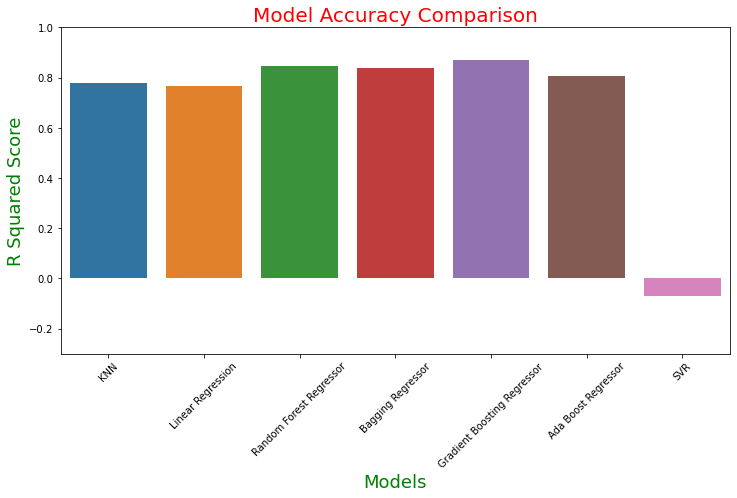

In [408]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.barplot(x=['KNN', 'Linear Regression', 'Random Forest Regressor', 'Bagging Regressor', 'Gradient Boosting Regressor', 'Ada Boost Regressor', 'SVR'], y=r_Squared_all)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison", fontsize=20, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('R Squared Score', fontsize=18, color='g')
plt.ylim(-0.3, 1)
plt.show()



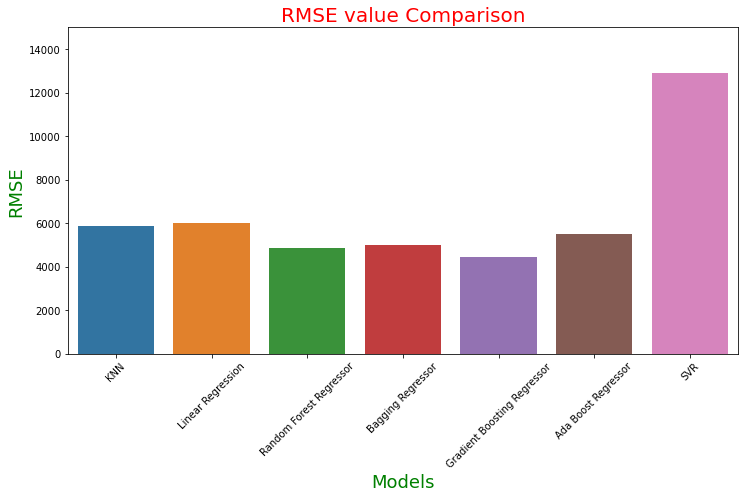

In [409]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.barplot(x=['KNN', 'Linear Regression', 'Random Forest Regressor', 'Bagging Regressor',
            'Gradient Boosting Regressor', 'Ada Boost Regressor', 'SVR'], y=RMSE_all)
plt.xticks(rotation=45)
plt.title("RMSE value Comparison", fontsize=20, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('RMSE', fontsize=18, color='g')
plt.ylim(0, 15000)
plt.show()


# <b>Kesimpulan</b>
- ML model yang memiliki performa terbaik berdasarkan nilai R-squared dan RMSE adalah <b>*Random Forest Regressor</b>
- Ini membuktikan asumsi yang beredar di kalangan Data Expert bahwa Random Forest Regressor adalah salah satu algoritma supervised learning yang paling powerful pada saat ini
- Ketika seorang analis memiliki data yang berkualitas bagus, maka model sederhana pun akan memiliki performa yang baik (*garbage in garbage out*), ini terjadi pada dataset insurance yang memiliki kualitas yang sangat baik

# <b>Saran</b>
- Dalam pengembangan Machine learning yang memiliki data lebih kompleks (data jutaan),perlu dipertimbangkan untuk mereduksi jumlah feature agar proses komputasi/ running model akan lebih cepat
- Perlunya memperluas penggunaan model machine learning yang lain(seperti XGboost) untuk memperkaya opsi ML model 

# <b>Target Penulis kedepan:</b>
- kedepannya penulis akan mencoba untuk menganalisa dataset yang lebih kompleks, memiliki banyak outlier dan missing value, memiliki banyak parameter yang bisa meningkatkan skill dan kemampuan dalam menganalisa, memproses, dan me modelkan data, sehingga output yang dihasilkan memiliki performa yang baik